In [3]:
import numpy as np
import tensorflow as lf
import matplotlib.pyplot as plt
import keras

In [4]:
data_fashion = keras.datasets.fashion_mnist

In [5]:
(train_images, train_label), (test_images, test_label) = data_fashion.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

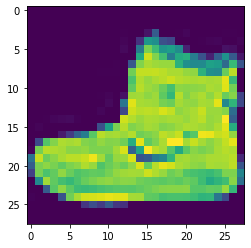

In [8]:
plt.imshow(train_images[0])

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

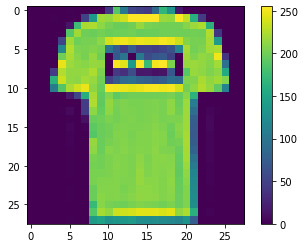

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        
    ]
)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
model.fit(train_images, train_label)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5037 - accuracy: 0.8221


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_label, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4898 - accuracy: 0.8240
Test accuracy: 0.8240000009536743


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[0]

array([7.8105164e-05, 4.2781508e-06, 3.1959789e-05, 1.2494096e-05,
       2.1579979e-05, 1.9975910e-02, 1.2732607e-04, 2.1895592e-01,
       3.8635905e-03, 7.5692886e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])    

9

In [19]:
test_label[0]

9

1/1 [==============================] - 0s 32ms/step


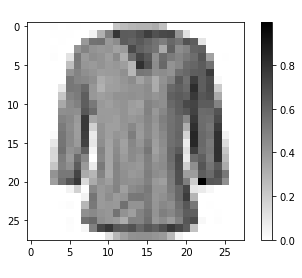

In [20]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_label[num]
predict(model, image, label)

In [28]:
model.layers

TypeError: object of type 'ResourceVariable' has no len()